In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('OiDj_merged.csv')


df['IsBus'] = np.where(df['net_mode'] == 1, 1, 0)
df['IsRail'] = np.where(df['net_mode'] == 2, 1, 0)

print(df.head())

   Unnamed: 0  idx      Ck1Road       Ck1Bus      Ck1Rail      Ck2Road  \
0           0    0  7875351.359  3020828.439  9164254.201  7864111.513   
1           1    1  7875351.359  3020828.439  9164254.201  7865522.820   
2           2    2  7875351.359  3020828.439  9164254.201  7863413.383   
3           3    3  7875351.359  3020828.439  9164254.201  7864066.587   
4           4    4  7875351.359  3020828.439  9164254.201  7865096.332   

        Ck2Bus      Ck2Rail    CkDiffRoad    CkDiffBus  ...    Oi_road_y  \
0  3018331.319  9177991.167 -11239.845770 -2497.120307  ...   350.334919   
1  3018647.914  9176263.266  -9828.538792 -2180.525344  ...   113.748712   
2  3018177.754  9178842.863 -11937.976120 -2650.685685  ...   118.006317   
3  3018320.702  9178046.710 -11284.771780 -2507.736989  ...   484.652069   
4  3018553.067  9176784.601 -10255.026640 -2275.372523  ...  1073.108343   

     Oi_bus_y    Oi_rail_y  Oi_net_j    Dj_road_y    Dj_bus_y    Dj_rail_y  \
0   55.094572   421.

In [2]:
df['Ck_Total'] = (df['Ck1Road']+df['Ck1Bus']+df['Ck1Rail'])

df['CkRoad_frac'] = df['Ck2Road']/df['Ck_Total']
df['CkBus_frac'] = df['Ck2Bus']/df['Ck_Total']
df['CkRail_frac'] = df['Ck2Rail']/df['Ck_Total']


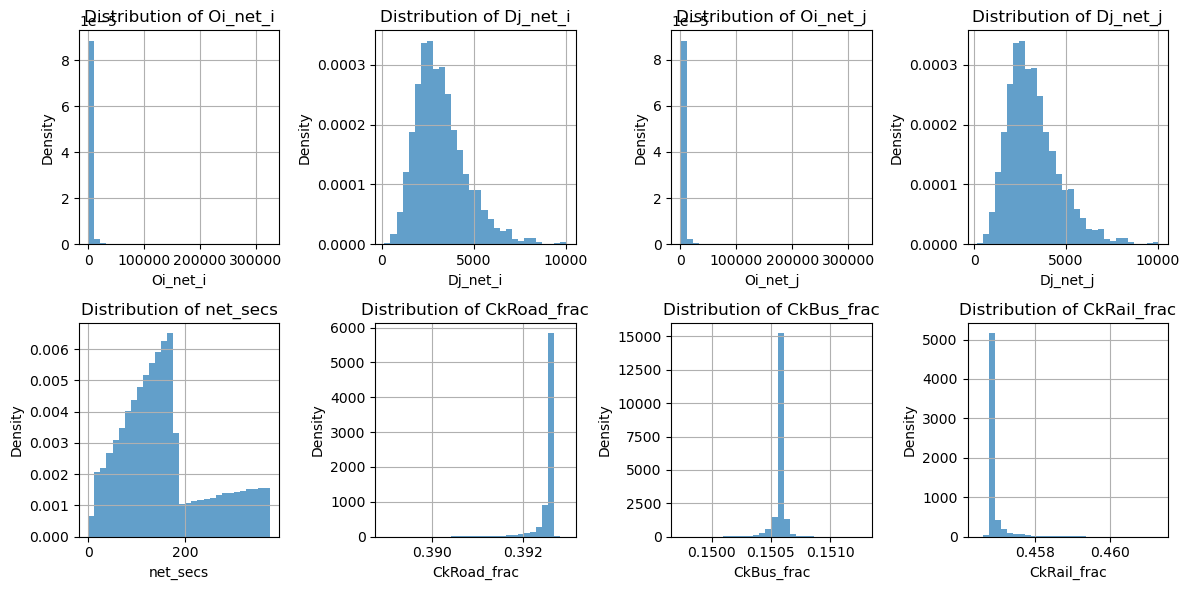

Skewness of the features:
Oi_net_i       21.003628
Dj_net_i        0.994931
Oi_net_j       20.456883
Dj_net_j        0.990325
net_secs        0.735531
CkRoad_frac    -5.222177
CkBus_frac     -3.120518
CkRail_frac     5.175410
dtype: float64


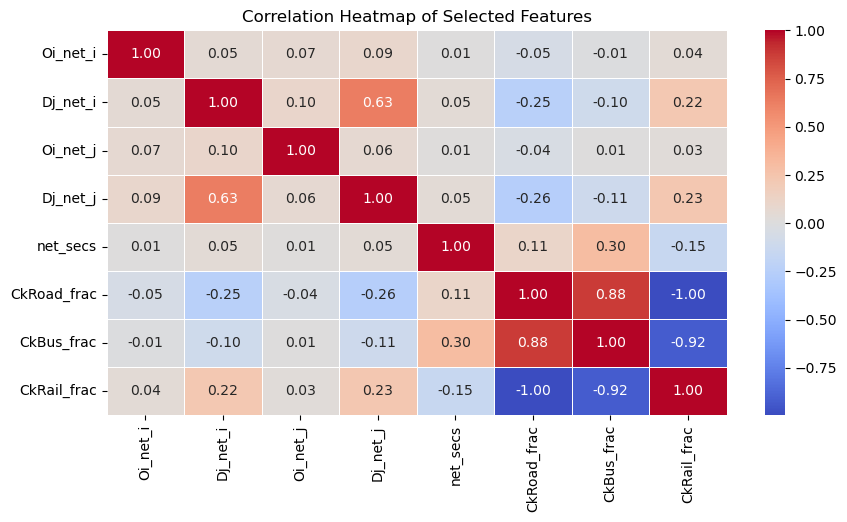

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

dafni_impacts_enriched_df = df

fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs = axs.flatten() 

# Plotting histograms for each feature
columns = ['Oi_net_i', 'Dj_net_i', 'Oi_net_j', 'Dj_net_j', 'net_secs','CkRoad_frac','CkBus_frac','CkRail_frac']
for i, column in enumerate(columns):
    row = i // 3 
    col = i % 3
    axs[i].hist(dafni_impacts_enriched_df[column], density=True, bins=30, alpha=0.7)
    axs[i].set_title(f'Distribution of {column}')
    axs[i].set_ylabel('Density')
    axs[i].set_xlabel(column)
    axs[i].grid(True)

# axs[-1].axis('off')

plt.tight_layout()
plt.show()

# Check the skewness
print("Skewness of the features:")
print(dafni_impacts_enriched_df[columns].skew())

# Heat map of correlation between features
selected_features = dafni_impacts_enriched_df[columns]
corr_matrix = selected_features.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer

# Apply logarithmic conversion to correct for positive skewness
dafni_impacts_enriched_df['Oi_net_i_log'] = np.log1p(dafni_impacts_enriched_df['Oi_net_i'])
dafni_impacts_enriched_df['Oi_net_j_log'] = np.log1p(dafni_impacts_enriched_df['Oi_net_j'])

# Apply square root conversion to correct for negative bias (ensure no zero values)
dafni_impacts_enriched_df['net_secs_sqrt'] = np.sqrt(dafni_impacts_enriched_df['net_secs'] + 1) # Add 1 to avoid taking the square root of 0

#### correction for 3 targets
# dafni_impacts_enriched_df['CkRoadfrac_quantile'] = np.log1p(abs(dafni_impacts_enriched_df['CkRoad_frac']))
# quantile_transformer = QuantileTransformer(output_distribution='normal', n_quantiles=1000)
# dafni_impacts_enriched_df['CkRoad_frac'] = dafni_impacts_enriched_df['CkRoad_frac'].replace([np.inf, -np.inf], np.nan).dropna()
# dafni_impacts_enriched_df['CkRoadfrac'] = quantile_transformer.fit_transform(dafni_impacts_enriched_df[['CkRoad_frac']])

# dafni_impacts_enriched_df['CkBus_frac'] = dafni_impacts_enriched_df['CkBus_frac'].replace([np.inf, -np.inf], np.nan).dropna()
# dafni_impacts_enriched_df['CkBusfrac'] = quantile_transformer.fit_transform(dafni_impacts_enriched_df[['CkBus_frac']])

# dafni_impacts_enriched_df['CkRail_frac'] = dafni_impacts_enriched_df['CkRail_frac'].replace([np.inf, -np.inf], np.nan).dropna()
# dafni_impacts_enriched_df['CkRailfrac_quantile'] = quantile_transformer.fit_transform(dafni_impacts_enriched_df[['CkRail_frac']])


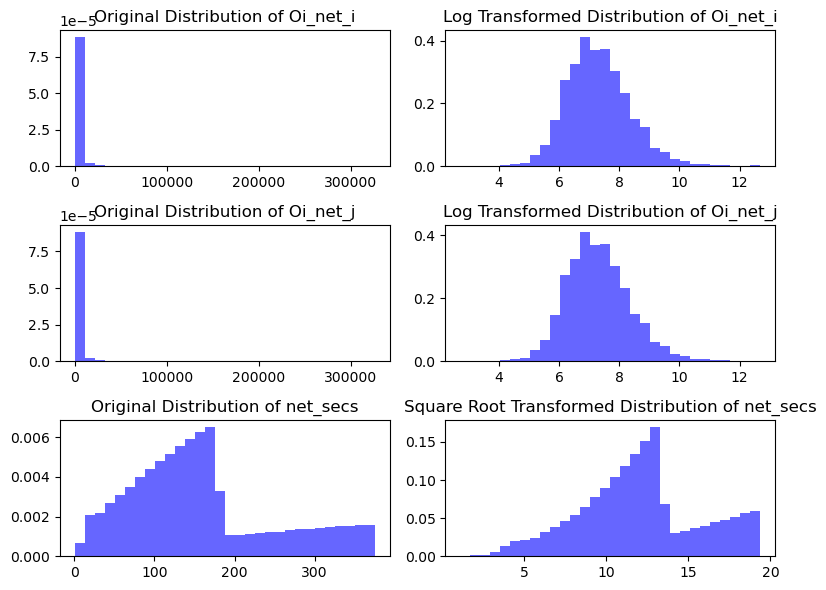

In [5]:
fig, axs = plt.subplots(3, 2, figsize=(8, 6)) 

# Oi_net_i 
axs[0, 0].hist(dafni_impacts_enriched_df['Oi_net_i'], bins=30, density=True, alpha=0.6, color='blue')
axs[0, 0].set_title('Original Distribution of Oi_net_i')
axs[0, 1].hist(dafni_impacts_enriched_df['Oi_net_i_log'], bins=30, density=True, alpha=0.6, color='blue')
axs[0, 1].set_title('Log Transformed Distribution of Oi_net_i')

# Oi_net_j 
axs[1, 0].hist(dafni_impacts_enriched_df['Oi_net_j'], bins=30, density=True, alpha=0.6, color='blue')
axs[1, 0].set_title('Original Distribution of Oi_net_j')
axs[1, 1].hist(dafni_impacts_enriched_df['Oi_net_j_log'], bins=30, density=True, alpha=0.6, color='blue')
axs[1, 1].set_title('Log Transformed Distribution of Oi_net_j')

# net_secs 
axs[2, 0].hist(dafni_impacts_enriched_df['net_secs'], bins=30, density=True, alpha=0.6, color='blue')
axs[2, 0].set_title('Original Distribution of net_secs')
axs[2, 1].hist(dafni_impacts_enriched_df['net_secs_sqrt'], bins=30, density=True, alpha=0.6, color='blue')
axs[2, 1].set_title('Square Root Transformed Distribution of net_secs')

# # CkRoadfrac_quantile 
# axs[3, 0].hist(dafni_impacts_enriched_df['CkRoad_frac'], bins=30, density=True, alpha=0.6, color='green')
# axs[3, 0].set_title('Original Distribution of CkRoad_frac')
# axs[3, 1].hist(dafni_impacts_enriched_df['CkRoadfrac_log'], bins=30, density=True, alpha=0.6, color='green')
# axs[3, 1].set_title('Log Transformed Distribution of CkRoadfrac_quantile')

# # CkBusfrac_quantile 
# axs[4, 0].hist(dafni_impacts_enriched_df['CkBus_frac'], bins=30, density=True, alpha=0.6, color='green')
# axs[4, 0].set_title('Original Distribution of CkBus_frac')
# axs[4, 1].hist(dafni_impacts_enriched_df['CkBusfrac_quantile'], bins=30, density=True, alpha=0.6, color='green')
# axs[4, 1].set_title('Transformed Distribution of CkBus_frac')

# # CkRailfrac_quantile 
# axs[5, 0].hist(dafni_impacts_enriched_df['CkRail_frac'], bins=30, density=True, alpha=0.6, color='green')
# axs[5, 0].set_title('Original Distribution of CkRail_frac')
# axs[5, 1].hist(dafni_impacts_enriched_df['CkRailfrac_quantile'], bins=30, density=True, alpha=0.6, color='green')
# axs[5, 1].set_title('Transformed Distribution of CkRail_frac')


plt.tight_layout()
plt.show()

In [6]:
# dafni_impacts_enriched_df.to_csv('dafni_impacts_enriched.csv', index=False)
dafni_impacts_enriched_df

,Unnamed: 0,idx,Ck1Road,Ck1Bus,Ck1Rail,Ck2Road,Ck2Bus,Ck2Rail,CkDiffRoad,CkDiffBus,...,Dj_net_j,IsBus,IsRail,Ck_Total,CkRoad_frac,CkBus_frac,CkRail_frac,Oi_net_i_log,Oi_net_j_log,net_secs_sqrt
0,0,0,7.875351e+06,3.020828e+06,9.164254e+06,7.864112e+06,3.018331e+06,9.177991e+06,-11239.845770,-2497.120307,...,3508.670636,0,1,2.006043e+07,0.392021,0.150462,0.457517,7.367077,6.719013,10.639426
1,1,1,7.875351e+06,3.020828e+06,9.164254e+06,7.865523e+06,3.018648e+06,9.176263e+06,-9828.538792,-2180.525344,...,3540.944967,0,1,2.006043e+07,0.392091,0.150478,0.457431,7.367077,5.572154,7.601440
2,2,2,7.875351e+06,3.020828e+06,9.164254e+06,7.863413e+06,3.018178e+06,9.178843e+06,-11937.976120,-2650.685685,...,3524.517321,0,1,2.006043e+07,0.391986,0.150454,0.457560,7.367077,5.613128,12.472545
3,3,3,7.875351e+06,3.020828e+06,9.164254e+06,7.864067e+06,3.018321e+06,9.178047e+06,-11284.771780,-2507.736989,...,3967.800168,0,1,2.006043e+07,0.392019,0.150461,0.457520,7.367077,7.034388,11.459054
4,4,4,7.875351e+06,3.020828e+06,9.164254e+06,7.865096e+06,3.018553e+06,9.176785e+06,-10255.026640,-2275.372523,...,4468.926742,0,1,2.006043e+07,0.392070,0.150473,0.457457,7.367077,7.798523,8.610208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494114,494114,49995,7.875351e+06,3.020828e+06,9.164254e+06,7.875352e+06,3.020828e+06,9.164254e+06,0.480146,-0.161877,...,3288.081372,0,0,2.006043e+07,0.392581,0.150586,0.456832,5.236442,7.131699,8.982218
494115,494115,49996,7.875351e+06,3.020828e+06,9.164254e+06,7.875351e+06,3.020829e+06,9.164254e+06,-0.351458,0.112101,...,3619.027651,0,0,2.006043e+07,0.392581,0.150586,0.456832,5.236442,6.308098,9.043490
494116,494116,49997,7.875351e+06,3.020828e+06,9.164254e+06,7.875351e+06,3.020829e+06,9.164255e+06,-0.713950,0.240698,...,3447.770980,0,0,2.006043e+07,0.392581,0.150586,0.456832,5.236442,9.675457,11.255147
494117,494117,49998,7.875351e+06,3.020828e+06,9.164254e+06,7.875352e+06,3.020828e+06,9.164254e+06,0.996852,-0.338894,...,1907.498509,0,0,2.006043e+07,0.392581,0.150586,0.456832,5.236442,8.488588,9.198408


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Select feature columns for PCA
pca_features = ['Oi_net_i_log', 'Oi_net_j_log', 'Dj_net_i', 'Dj_net_j', 'net_secs_sqrt','IsBus','IsRail']

rows_before = dafni_impacts_enriched_df.shape[0]
dafni_impacts_enriched_df = dafni_impacts_enriched_df.dropna(subset=pca_features)
rows_after = dafni_impacts_enriched_df.shape[0]
rows_deleted = rows_before - rows_after
print(f"Deleted {rows_deleted} rows due to missing values.")


# standardized
scaler = StandardScaler()
features_scaled = scaler.fit_transform(dafni_impacts_enriched_df[pca_features])

# # Initialise the PCA 
# pca = PCA(n_components=5) 
# Explained variance ratio: [0.367677   0.20138951 0.19177514 0.16976602 0.06939232]

pca = PCA(n_components=4) 

# fitting PCA
pca_result = pca.fit_transform(features_scaled)
pca_df = pd.DataFrame(data=pca_result)

# Explained variance ratios
print("Explained variance ratio:", pca.explained_variance_ratio_)

Deleted 1 rows due to missing values.
Explained variance ratio: [0.28169263 0.25577246 0.1414154  0.12214235]


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# target
targets = dafni_impacts_enriched_df[['CkRoad_frac', 'CkBus_frac', 'CkRail_frac']].values

# option 1:Using PCA features as input features
# features_pca = pca_df.values  
# X_train, X_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.2, random_state=42)


# option2: use skewed and non-PCA features
features = dafni_impacts_enriched_df[pca_features]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# # Data standardisation - Z-score standardisation
# scaler = StandardScaler()
# X_train= scaler.fit_transform(X_train)
# X_test= scaler.transform(X_test)


from sklearn.preprocessing import MinMaxScaler
# Data normalisation - scaling data to between 0 and 1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Model Creation Function
def createNetwork(num_inputs, neurons_per_layer, activations, kernel_initializers, dropout_rates):
    model = Sequential()
    model.add(Dense(neurons_per_layer[0], input_dim=num_inputs, activation=activations[0], kernel_initializer=kernel_initializers[0]))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rates[0]))
    for i in range(1, len(neurons_per_layer)):
        model.add(Dense(neurons_per_layer[i], activation=activations[i], kernel_initializer=kernel_initializers[i]))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rates[i]))

    model.add(Dense(3, activation='softmax', kernel_initializer=kernel_initializers[-1]))  
    optimizer = Adam(learning_rate=0.001)

    model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=['mean_squared_error'])
    
    return model


In [10]:
import datetime
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Append Experiment Results with Additional Model Configurations
def append_experiment_results(model_config, performance, file_path='TrainingLog/model_performance_summary.csv'):
    if not os.path.isfile(file_path):
        df = pd.DataFrame(columns=list(model_config.keys()) + list(performance.keys()))
        df.to_csv(file_path, index=False)
    else:
        results_df = pd.DataFrame([{**model_config, **performance}])
        results_df.to_csv(file_path, mode='a', header=False, index=False)
    print(f'Results appended to {file_path}')

# Train Model Function
def trainModel(model, X_train, y_train, X_test, y_test, epochs, batchSize, val_split, model_config):
    timestamp = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    training_log_filename = f'TrainingLog/training_log_{timestamp}.csv'
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
        ModelCheckpoint('model_best.h5', monitor='val_loss', save_best_only=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1),
        CSVLogger(training_log_filename)
    ]
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batchSize, validation_split=val_split, verbose=1, callbacks=callbacks)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
    mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
    r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')

    performance = {
        'mse': mse,
        'mae': mae,
        'r2': r2
    }

    # append_experiment_results(model_config, performance)
    
    return history, performance


In [11]:
# Customizable model parameters
neurons_per_layer = [256, 256, 256, 256]  
activations = ['relu', 'relu', 'relu','relu']  
kernel_initializers = ['glorot_uniform', 'glorot_uniform', 'glorot_uniform', 'glorot_uniform']  
dropout_rates = [0.1, 0.1, 0.1,0.1]  
model_params = {'epochs': 1000, 'batchSize': 64}
model_config = {
    'model_layers': len(neurons_per_layer),
    'neurons_per_layer': neurons_per_layer,
    'activations': activations,
    'kernel_initializers': kernel_initializers,
    'dropout_rates': dropout_rates,
    'optimizer': 'adam'
}

In [12]:
# Train the model
model = createNetwork(num_inputs=X_train.shape[1], neurons_per_layer=neurons_per_layer, activations=activations, kernel_initializers=kernel_initializers, dropout_rates=dropout_rates)
history, performance = trainModel(model, X_train, y_train, X_test, y_test, model_params['epochs'], model_params['batchSize'], 0.2, model_config)

Epoch 1/1000
4931/4942 [============================>.] - ETA: 0s - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 1: val_loss improved from inf to 0.00001, saving model to model_best.h5
4942/4942 [==============================] - 19s 3ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 8.7028e-06 - val_mean_squared_error: 8.7028e-06 - lr: 0.0010
Epoch 2/1000
4938/4942 [============================>.] - ETA: 0s - loss: 3.5639e-06 - mean_squared_error: 3.5639e-06
Epoch 2: val_loss improved from 0.00001 to 0.00000, saving model to model_best.h5
4942/4942 [==============================] - 17s 3ms/step - loss: 3.5618e-06 - mean_squared_error: 3.5618e-06 - val_loss: 1.0229e-06 - val_mean_squared_error: 1.0229e-06 - lr: 0.0010
Epoch 3/1000
4929/4942 [============================>.] - ETA: 0s - loss: 2.5381e-06 - mean_squared_error: 2.5381e-06
Epoch 3: val_loss did not improve from 0.00000
4942/4942 [==============================] - 18s 4ms/step - loss: 2.5339e-06 - mean_squar

In [13]:
print("Mean Absolute Error (MAE):", performance['mae'])
print("Mean Squared Error (MSE):", performance['mse'])
print("R2 Score:", performance['r2'])

Mean Absolute Error (MAE): [5.38547162e-05 1.62766372e-05 6.52544307e-05]
Mean Squared Error (MSE): [2.13887227e-08 1.24770878e-09 3.15685477e-08]
R2 Score: 0.5154476417438658


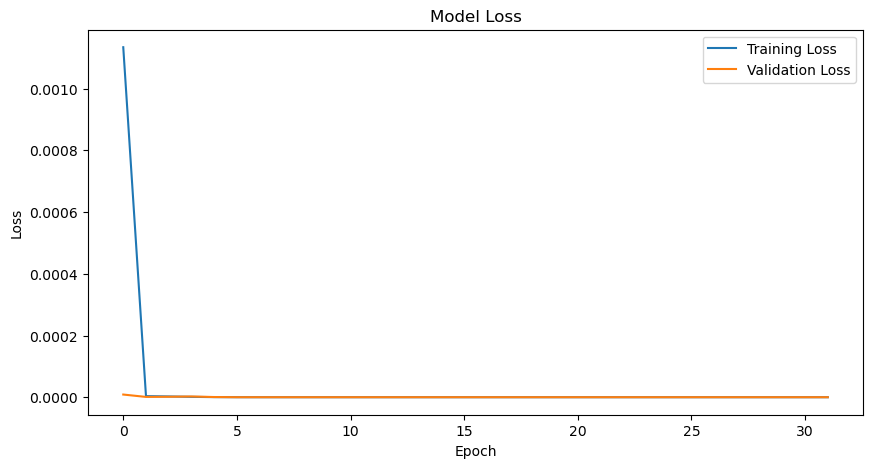

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


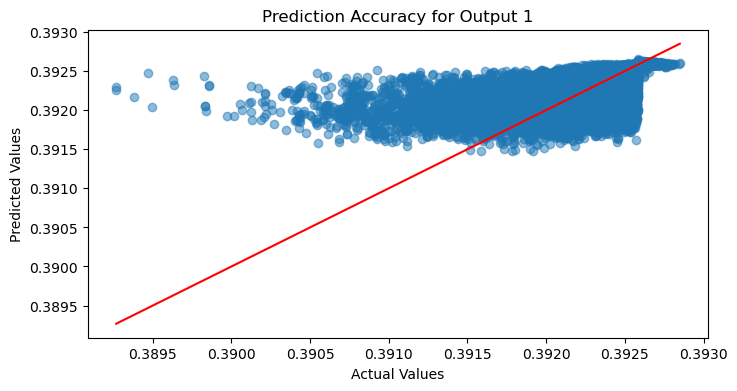

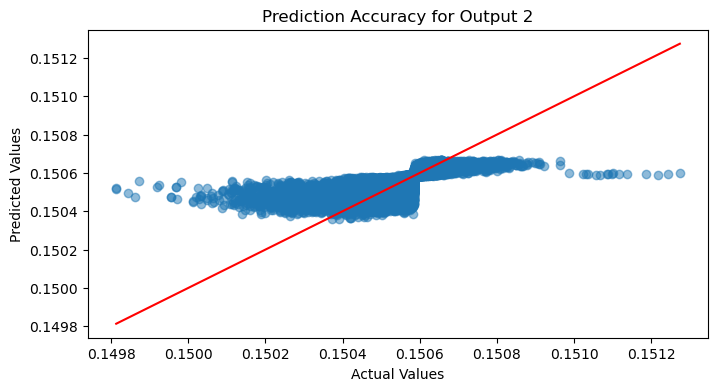

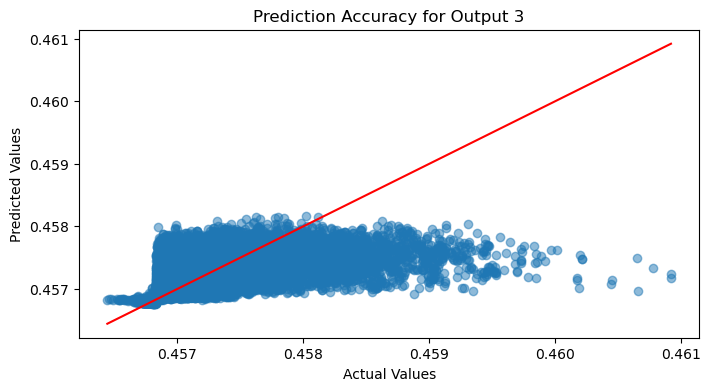

In [18]:
for i in range(y_test.shape[1]):
    plt.figure(figsize=(8, 4))
    plt.scatter(y_test[:, i], y_pred[:, i], alpha=0.5)
    plt.title(f'Prediction Accuracy for Output {i+1}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([min(y_test[:, i]), max(y_test[:, i])], [min(y_test[:, i]), max(y_test[:, i])], color='red')  # Perfect prediction diagonal
    plt.show()
